<a href="https://colab.research.google.com/github/AnuragGajula/Chocolate_Sales_Data/blob/main/Ag_chocolate_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chocolate Sales Data ETL and Analysis by ~ Anurag Gajula

In [ ]:
Link = "https://raw.githubusercontent.com/AnuragGajula/Chocolate_Sales_Data/refs/heads/main/Chocolate%20Sales.csv"
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Patch

dataset_url = Link

try:
    data = pd.read_csv(dataset_url)
    print(data.head())
except Exception as e:
    print(f"Error loading dataset: {e}")

     Sales Person    Country              Product       Date    Amount  \
0  Jehu Rudeforth         UK      Mint Chip Choco  04-Jan-22   $5,320    
1     Van Tuxwell      India        85% Dark Bars  01-Aug-22   $7,896    
2    Gigi Bohling      India  Peanut Butter Cubes  07-Jul-22   $4,501    
3    Jan Morforth  Australia  Peanut Butter Cubes  27-Apr-22  $12,726    
4  Jehu Rudeforth         UK  Peanut Butter Cubes  24-Feb-22  $13,685    

   Boxes Shipped  
0            180  
1             94  
2             91  
3            342  
4            184  


# Display Data info Data types and identifying any dupicated data

In [ ]:
# Display the first few rows
print(data.head())

# Check basic information about the DataFrame
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Check for duplicates
print(data.duplicated().sum())

     Sales Person    Country              Product       Date    Amount  \
0  Jehu Rudeforth         UK      Mint Chip Choco  04-Jan-22   $5,320    
1     Van Tuxwell      India        85% Dark Bars  01-Aug-22   $7,896    
2    Gigi Bohling      India  Peanut Butter Cubes  07-Jul-22   $4,501    
3    Jan Morforth  Australia  Peanut Butter Cubes  27-Apr-22  $12,726    
4  Jehu Rudeforth         UK  Peanut Butter Cubes  24-Feb-22  $13,685    

   Boxes Shipped  
0            180  
1             94  
2             91  
3            342  
4            184  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null 

# Transforming the Data.

In [ ]:
# Data Preparation
data['DATE'] = pd.to_datetime(data['Date'], format='%d-%b-%y')
data['Month_Name'] = data['DATE'].dt.month_name()
data['Year'] = data['DATE'].dt.year
data['Month'] = data['DATE'].dt.month
data['Amount'] = data['Amount'].replace('[\$,]', '', regex=True).astype(float)
data

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,DATE,Month_Name,Year,Month
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,5320.0,180,2022-01-04,January,2022,1
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,7896.0,94,2022-08-01,August,2022,8
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,4501.0,91,2022-07-07,July,2022,7
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,12726.0,342,2022-04-27,April,2022,4
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,13685.0,184,2022-02-24,February,2022,2
...,...,...,...,...,...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,17-May-22,4410.0,323,2022-05-17,May,2022,5
1090,Jehu Rudeforth,USA,White Choc,07-Jun-22,6559.0,119,2022-06-07,June,2022,6
1091,Ches Bonnell,Canada,Organic Choco Syrup,26-Jul-22,574.0,217,2022-07-26,July,2022,7
1092,Dotty Strutley,India,Eclairs,28-Jul-22,2086.0,384,2022-07-28,July,2022,7


# Total Sales By counrty in terms of revenue and sale count

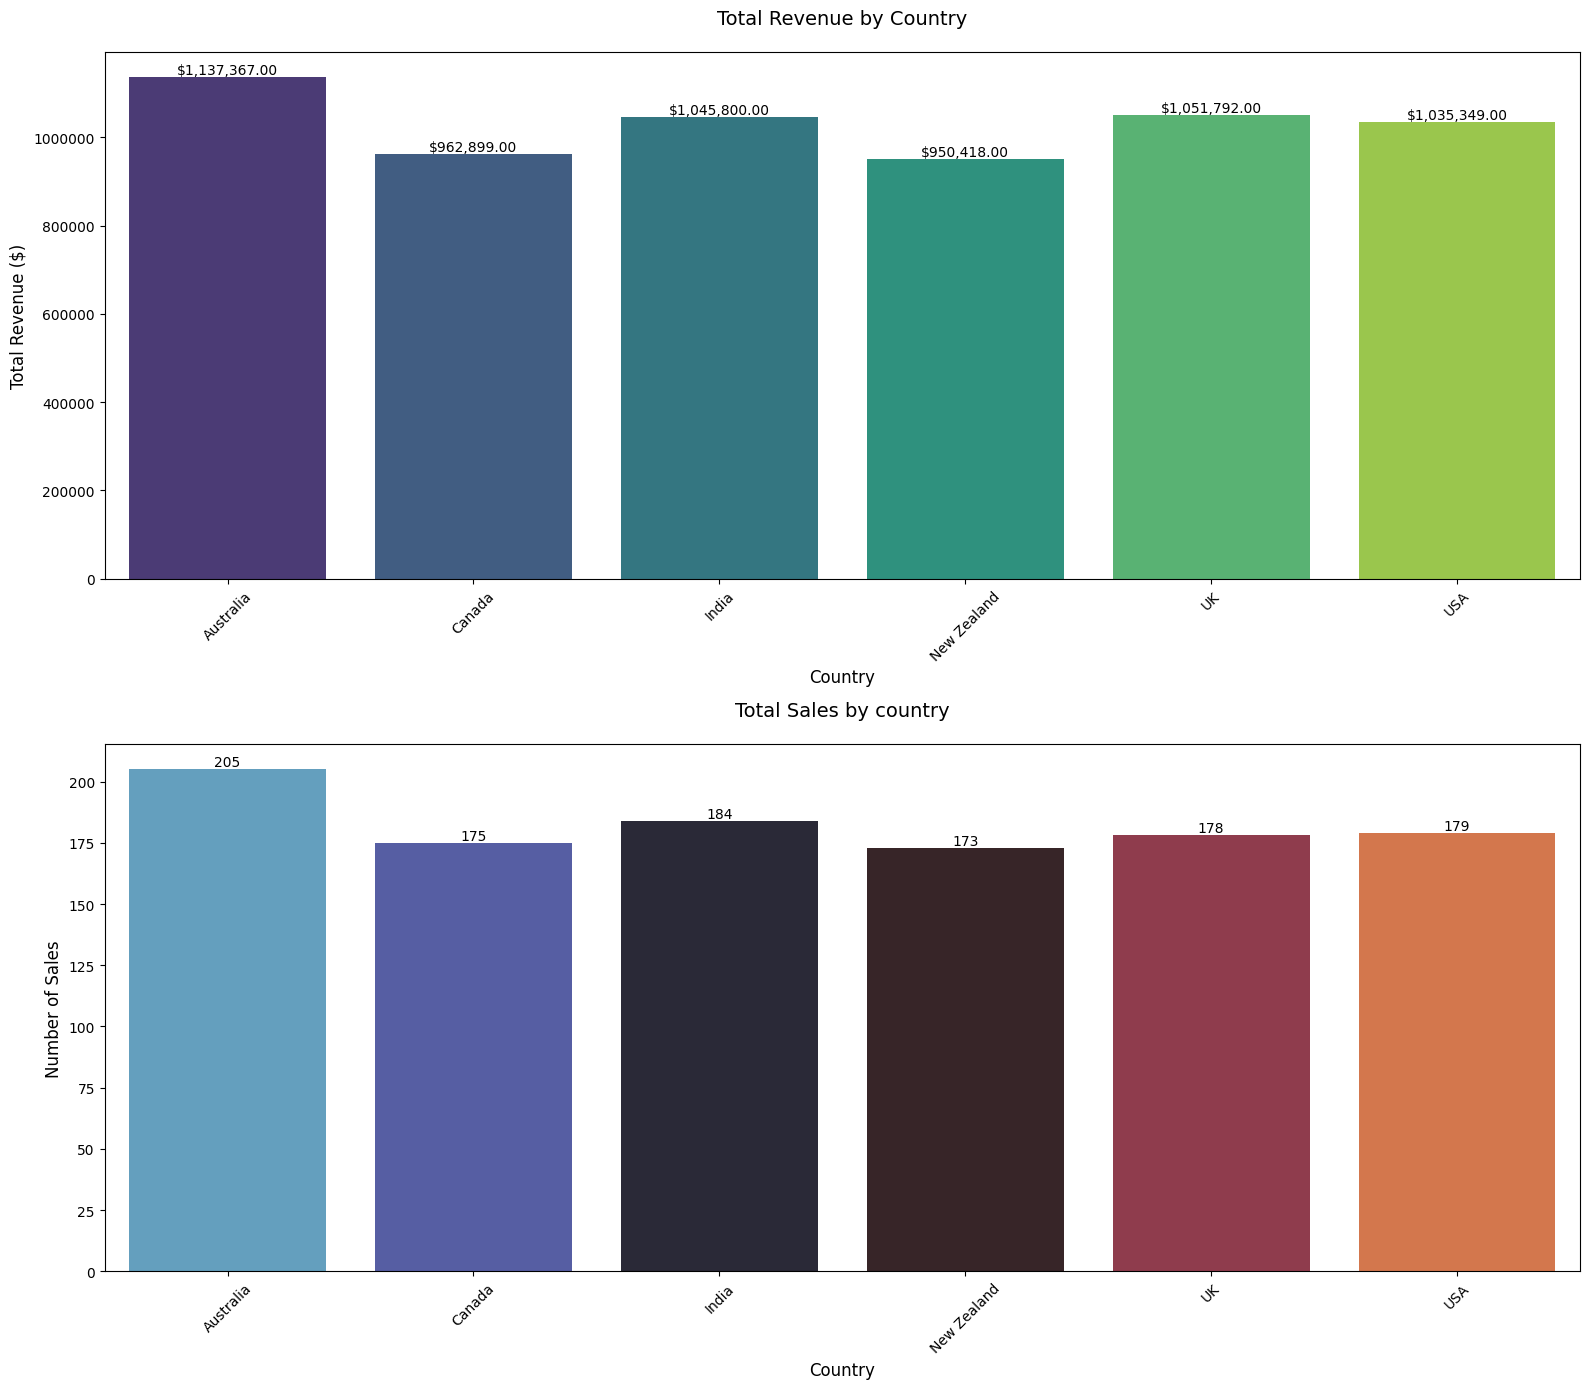

In [ ]:
sales_by_region_df = data.groupby('Country')['Amount'].sum().reset_index()
sales_count_by_region_df = data.groupby('Country')['Amount'].count().reset_index()


# Create visualization
plt.figure(figsize=(16, 14))

# 1. Revenue by Country
plt.subplot(2, 1, 1)  # Changed to 2 rows, 1 column layout
ax = sns.barplot(data=sales_by_region_df, x='Country', y='Amount',
                hue='Country', palette='viridis', legend=False)

# Add formatted values on bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(),
           f'${p.get_height():,.2f}',
           ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45)
plt.title('Total Revenue by Country', fontsize=14, pad=20)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')

# 2. Transaction Count by Country
plt.subplot(2, 1, 2)
ax = sns.barplot(data=sales_count_by_region_df, x='Country', y='Amount',
                hue='Country', palette='icefire', legend=False)

# Add formatted values on bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(),
           f'{int(p.get_height()):,}',
           ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45)
plt.title('Total Sales by country', fontsize=14, pad=20)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)


plt.tight_layout()
plt.show()

# Ploting to show sales by each country over this time in revenue and sales count and on the whole

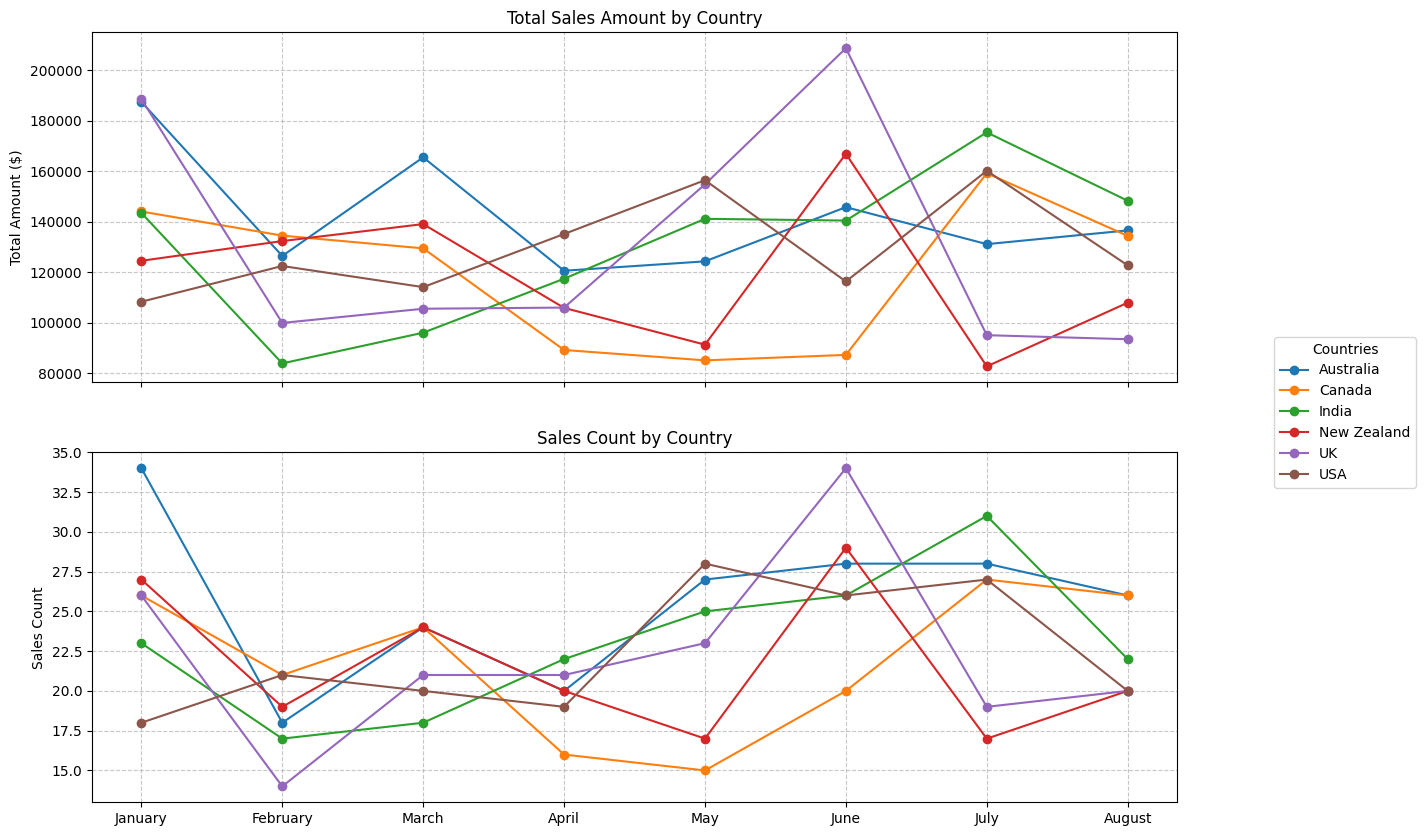

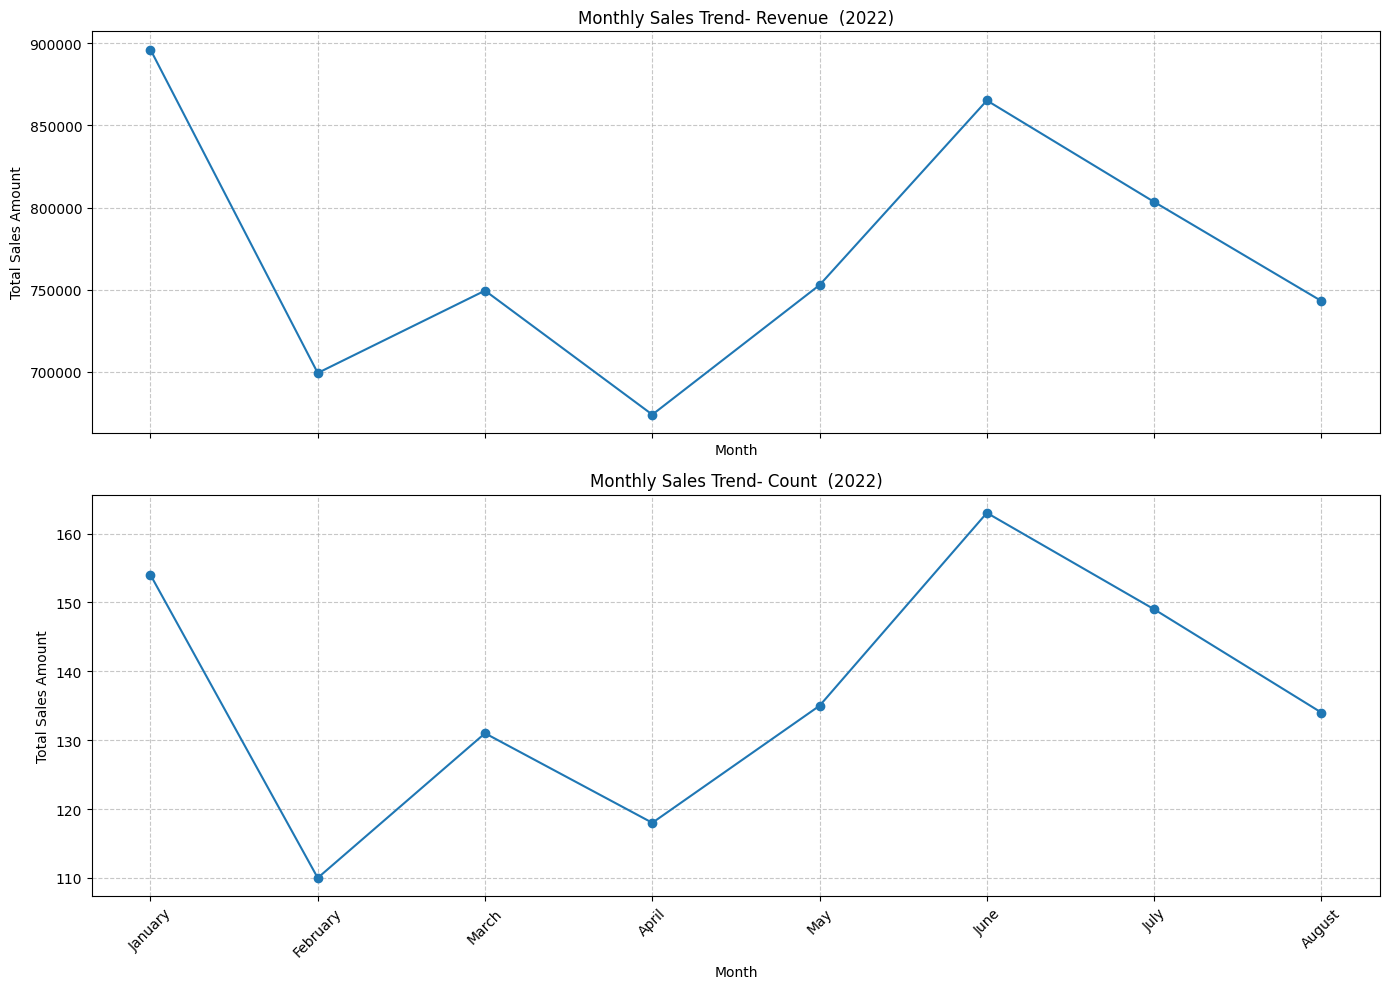

-The number of sales transactions follows a similar trend to revenue.
-Australia and New Zealand have the most noticeable variations in transaction count.
-February generally has lower sales count across all countries, possibly indicating a seasonal dip.
-June has the highest spike in sales count, aligning with revenue peaks.
-Canada and India maintain moderate but increasing trends toward mid-year.
-UK and USA show steady growth in transaction count, without drastic fluctuations.


In [ ]:
# Ploting to show sales by each country over this time in revenue and sales count
def analyze_and_plot_sales(data):

    # Aggregate data by Year, Month_Name, and Country
    monthly_sales = data.groupby(['Year', 'Month_Name', 'Country'])['Amount'].agg(['sum', 'count']).reset_index()
    monthly_sales.columns = ['Year', 'Month', 'Country', 'Total Amount', 'Sales Count']

    # Define month order and sort
    month_order = [
        'January', 'February', 'March', 'April', 'May', 'June',
        'July', 'August', 'September', 'October', 'November', 'December'
    ]
    monthly_sales['Month'] = pd.Categorical(monthly_sales['Month'], categories=month_order, ordered=True)
    monthly_sales = monthly_sales.sort_values(['Year', 'Month'])

    # Creating figure
    fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

    # Total Amount Plot
    for country in monthly_sales['Country'].unique():
        country_data = monthly_sales[monthly_sales['Country'] == country]
        axes[0].plot(country_data['Month'], country_data['Total Amount'], marker='o', label=country)

    axes[0].set_title('Total Sales Amount by Country')
    axes[0].set_ylabel('Total Amount ($)')
    axes[0].grid(linestyle='--', alpha=0.7)

    # Sales Count Plot
    for country in monthly_sales['Country'].unique():
        country_data = monthly_sales[monthly_sales['Country'] == country]
        axes[1].plot(country_data['Month'], country_data['Sales Count'], marker='o', label=country)

    axes[1].set_title('Sales Count by Country')
    axes[1].set_ylabel('Sales Count')
    axes[1].grid(linestyle='--', alpha=0.7)
     # Move legend outside the plot (Right Side)
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc=10, bbox_to_anchor=(1.02, 0.5), title="Countries", fontsize=10)


    # Creating figure
    fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

    monthly_sales_revenue = data.groupby(['Month', 'Month_Name'])['Amount'].sum().reset_index()
    monthly_sales_revenue = monthly_sales_revenue.sort_values('Month')


    axes[0].plot(monthly_sales_revenue['Month_Name'], monthly_sales_revenue['Amount'], marker='o')


    axes[0].set_title('Monthly Sales Trend- Revenue  (2022)')
    axes[0].set_xlabel('Month')
    axes[0].set_ylabel('Total Sales Amount')
    axes[0].grid(linestyle='--', alpha=0.7)

    monthly_sales_count = data.groupby(['Month', 'Month_Name'])['Amount'].count().reset_index()
    monthly_sales_count = monthly_sales_count.sort_values('Month')


    axes[1].plot(monthly_sales_count['Month_Name'], monthly_sales_count['Amount'], marker='o')

    axes[1].set_title('Monthly Sales Trend- Count  (2022)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Total Sales Amount')
    axes[1].grid(linestyle='--', alpha=0.7)



    plt.xticks(rotation=45)
    plt.tight_layout()  # Adjust layout to make space for legend
    plt.show()






# Call the function with data
analyze_and_plot_sales(data)

print("""-The number of sales transactions follows a similar trend to revenue.
-Australia and New Zealand have the most noticeable variations in transaction count.
-February generally has lower sales count across all countries, possibly indicating a seasonal dip.
-June has the highest spike in sales count, aligning with revenue peaks.
-Canada and India maintain moderate but increasing trends toward mid-year.
-UK and USA show steady growth in transaction count, without drastic fluctuations.""")

# Histogram showing the distrubtion of sales amount over sale count.

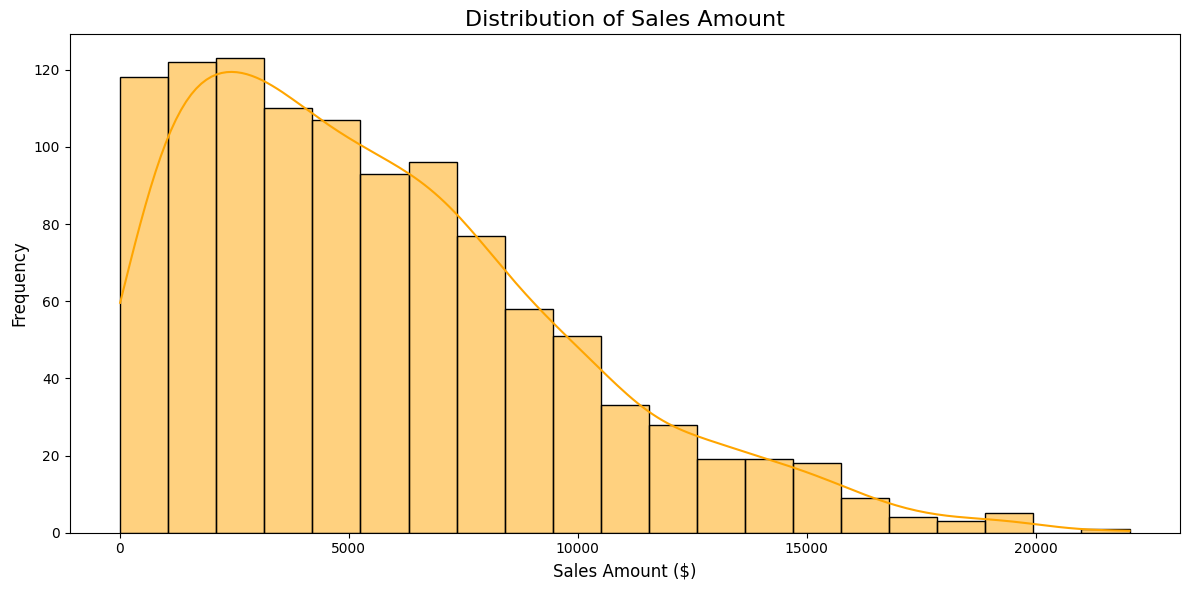

-Sales amount distribution is right-skewed – Most sales transactions are in the lower range, with fewer high-value transactions.
-A small number of large sales contribute significantly to revenue, highlighting the importance of high-value deals.
-This Plot shows that the highest frequency of sales occurs at lower sales amounts (~$0 - $5000).
-This suggests that most customers buy chocolates in small quantities or at lower prices.


In [ ]:
# Histogram showing the distrubtion of salesamount over sale count.
# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(data['Amount'], kde=True, color='orange')
plt.title('Distribution of Sales Amount', fontsize=16)
plt.xlabel('Sales Amount ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

print("""-Sales amount distribution is right-skewed – Most sales transactions are in the lower range, with fewer high-value transactions.
-A small number of large sales contribute significantly to revenue, highlighting the importance of high-value deals.
-This Plot shows that the highest frequency of sales occurs at lower sales amounts (~$0 - $5000).
-This suggests that most customers buy chocolates in small quantities or at lower prices.""")


# Revenue Performance Benchmark: Country Sales vs Global Average (2022)


-UK Dominates in Premium Sales
  Highest average sales ($5,909) and Z-score (+1.51σ).Shows success with high-value/large orders.
  Replicate this premium strategy in other markets

-USA Strong But Could Improve
  Solid performance ($5,784, +0.77σ) but only half as good as UK.
  Analyze what UK does better with similar customers.

-Australia's Volume vs Value Tradeoff
  Below-average sales per order ($5,548, -0.62σ) despite high shipment volume.
  Bundle small orders or implement minimum order values

-Canada/NZ Need Urgent Attention
  Worst performers (Z-scores near -1σ).
  Investigate pricing, product mix, or distribution issues

-India Shows Hidden Potential
  Slightly above average (+0.18σ) with room to grow.
  Test UK's premium strategies here first

-The Z-score standardization reveals performance gaps that raw numbers hide (e.g., NZ's -0.95σ is worse than Australia's -0.62σ despite similar dollar amounts).



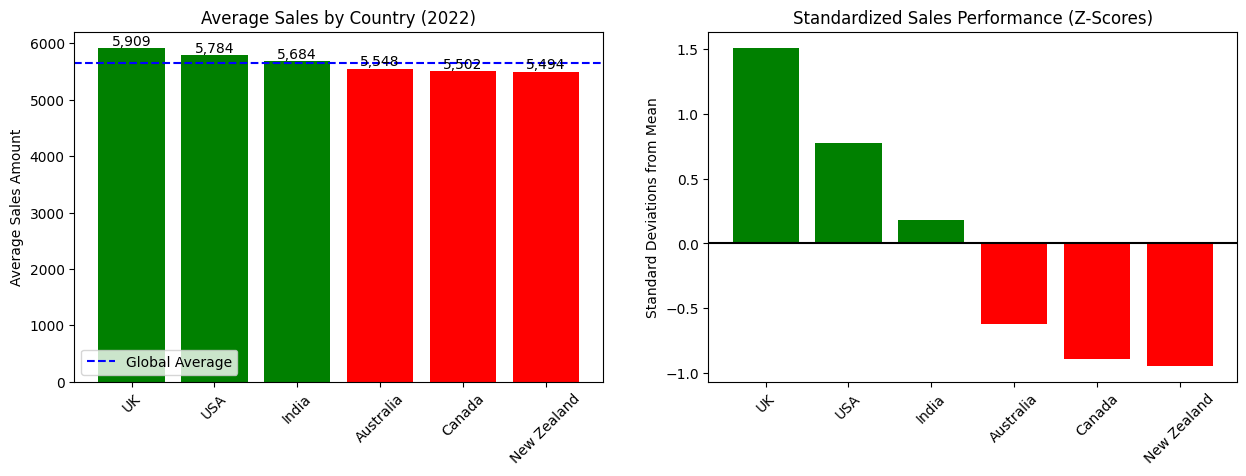

In [ ]:
# First, let's recreate the CountryAvgSales analysis from your SQL query
country_avg = data.groupby('Country')['Amount'].mean().reset_index()
global_avg = country_avg['Amount'].mean()
global_std = country_avg['Amount'].std()

# Calculate standardized scores
country_avg['StandardizedSales'] = (country_avg['Amount'] - global_avg) / global_std
country_avg = country_avg.sort_values('StandardizedSales', ascending=False)

# 2. Create visualization
plt.figure(figsize=(15, 10))
# Plot 1: Country Performance Comparison
plt.subplot(2, 2, 1)
bars = plt.bar(country_avg['Country'], country_avg['Amount'],
               color=np.where(country_avg['StandardizedSales'] >= 0, 'green', 'red'))
plt.axhline(y=global_avg, color='blue', linestyle='--', label='Global Average')
plt.title('Average Sales by Country (2022)')
plt.ylabel('Average Sales Amount')
plt.xticks(rotation=45)
plt.legend()

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,.0f}', ha='center', va='bottom')

# Plot 2: Standardized Scores (Z-Scores)
plt.subplot(2, 2, 2)
bars = plt.bar(country_avg['Country'], country_avg['StandardizedSales'],
               color=np.where(country_avg['StandardizedSales'] >= 0, 'green', 'red'))
plt.title('Standardized Sales Performance (Z-Scores)')
plt.ylabel('Standard Deviations from Mean')
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='-')

print("""
-UK Dominates in Premium Sales
  Highest average sales ($5,909) and Z-score (+1.51σ).Shows success with high-value/large orders.
  Replicate this premium strategy in other markets

-USA Strong But Could Improve
  Solid performance ($5,784, +0.77σ) but only half as good as UK.
  Analyze what UK does better with similar customers.

-Australia's Volume vs Value Tradeoff
  Below-average sales per order ($5,548, -0.62σ) despite high shipment volume.
  Bundle small orders or implement minimum order values

-Canada/NZ Need Urgent Attention
  Worst performers (Z-scores near -1σ).
  Investigate pricing, product mix, or distribution issues

-India Shows Hidden Potential
  Slightly above average (+0.18σ) with room to grow.
  Test UK's premium strategies here first

-The Z-score standardization reveals performance gaps that raw numbers hide (e.g., NZ's -0.95σ is worse than Australia's -0.62σ despite similar dollar amounts).
""")



# Distribution of shipment sizes (boxes shipped) by country

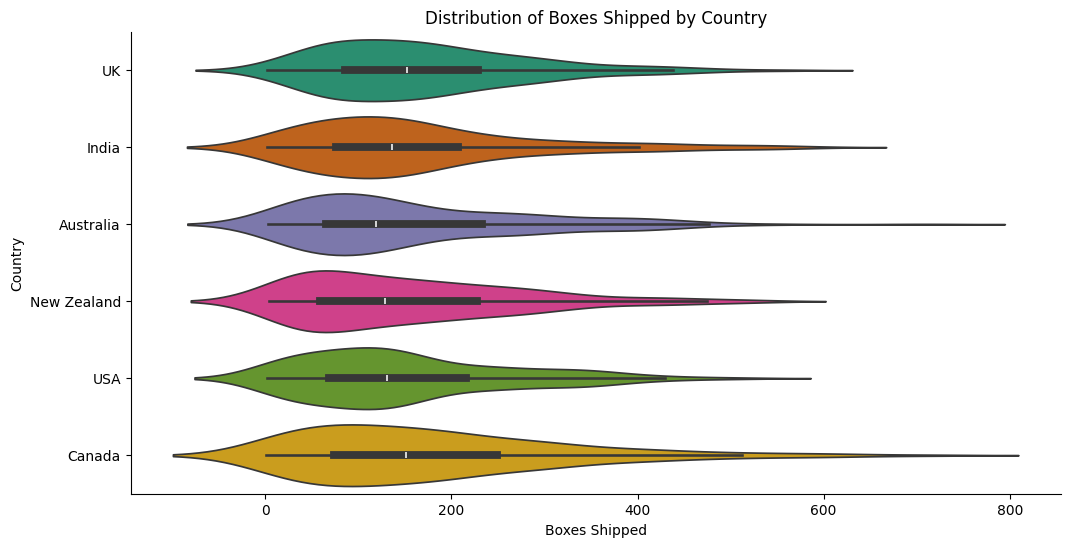


- Australia Dominates Volume Metrics
   - Leads in: Revenue ($5.5K avg), orders, and boxes shipped
   - But has -0.62σ below global average (many small orders)

- US/UK Have Quality Over Quantity
   - UK: Highest avg sales ($5.9K, +1.51σ)
   - USA: Strong performer ($5.78K, +0.77σ)
   - Fewer but larger orders (likely B2B/wholesale)

- Negative Correlation Products Exist
   - 85% Dark Bars (-0.15): More shipments = Less revenue
   - Suggests premium items need limited availability

- Shipping Patterns Differ
   - Australia: Many small spikes (retail)
   - US/UK: Fewer but wider distributions (bulk)

- Actionable Opportunities:
   - Australia: Boost average order value
   - US/UK: Expand high-value accounts
   - Negative-correlation products: Reposition as premium



In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=data, x='Boxes Shipped', y='Country',
              hue='Country',  # Added hue parameter
              inner='box',
              palette='Dark2',
              legend=False)  # Disabled legend as it's redundant
plt.title('Distribution of Boxes Shipped by Country')
sns.despine()
plt.show()

# 5 Key Insights from Your Data:
print("""
- Australia Dominates Volume Metrics
   - Leads in: Revenue ($5.5K avg), orders, and boxes shipped
   - But has -0.62σ below global average (many small orders)

- US/UK Have Quality Over Quantity
   - UK: Highest avg sales ($5.9K, +1.51σ)
   - USA: Strong performer ($5.78K, +0.77σ)
   - Fewer but larger orders (likely B2B/wholesale)

- Negative Correlation Products Exist
   - 85% Dark Bars (-0.15): More shipments = Less revenue
   - Suggests premium items need limited availability

- Shipping Patterns Differ
   - Australia: Many small spikes (retail)
   - US/UK: Fewer but wider distributions (bulk)

- Actionable Opportunities:
   - Australia: Boost average order value
   - US/UK: Expand high-value accounts
   - Negative-correlation products: Reposition as premium
""")

# Calculates a single correlation value for each product across all countries

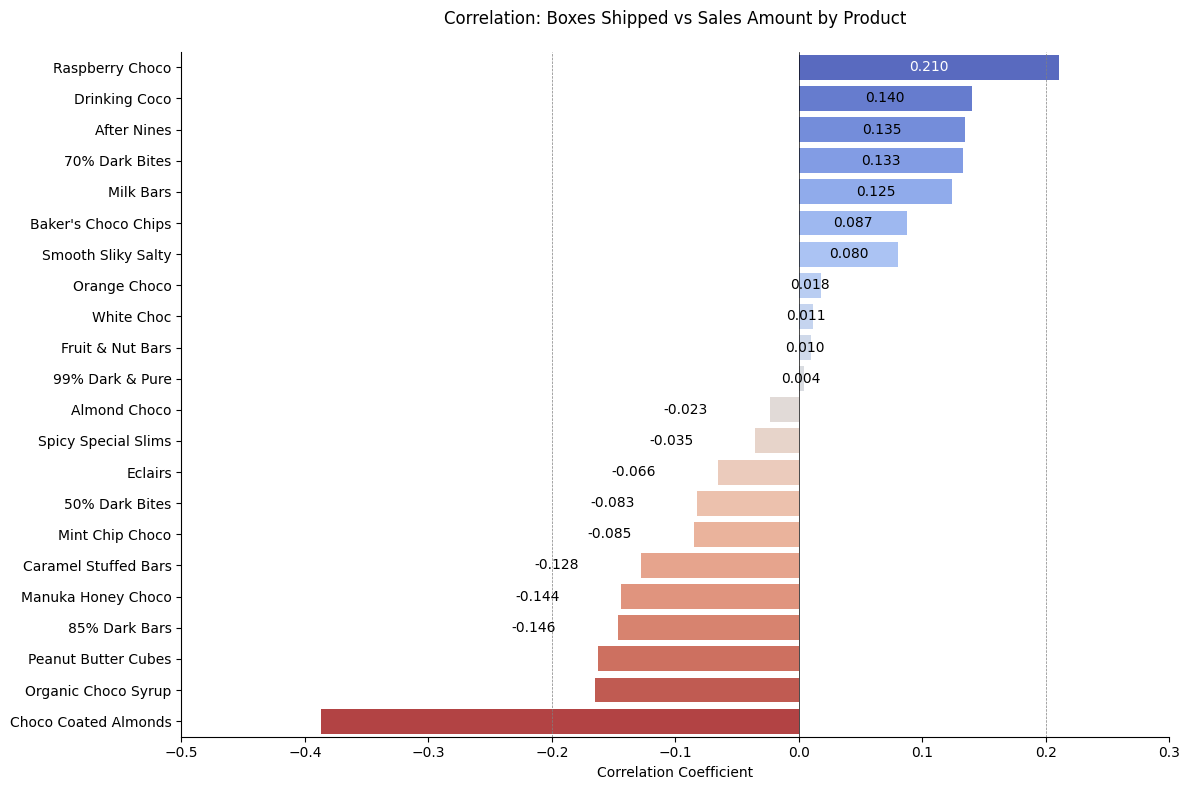


- Strong Positive Correlations (Right Side - Blue Bars)
    Products: Raspberry Choco (0.210), Drinking Coco (0.140), After Nines (0.135)
    Interpretation: Shipping more boxes reliably increases revenue

- Mild Positive Correlations (Center-Right - Lighter Blue)
    Products: 70% Dark Bites (0.133), Milk Bars (0.125)
    Interpretation: More shipments usually help, but not as predictably

- Negligible Correlations (Near Zero - Gray Bars)
    Products: White Choc (0.011), Fruit & Nut Bars (0.010)
    Interpretation: Shipping volume has almost no impact on revenue

- Negative Correlations (Left Side - Red Bars)
    Products:Mild: Almond Choco (-0.023), Spicy Special Slims (-0.035), Strong: 85% Dark Bars (-0.146), Organic Choco Syrup (-0.165)
    Interpretation: More shipments hurt revenue (likely premium/niche items)



In [ ]:
# Calculate correlations (FIXED version)
correlation_result = (
    data.groupby('Product')
    .apply(lambda x: x[['Boxes Shipped', 'Amount']].corr().iloc[0, 1],include_groups=False)
    .reset_index(name='Correlation')
    .sort_values('Correlation', ascending=False)
)

# Create plot (FIXED version)
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x='Correlation',
    y='Product',
    data=correlation_result,
    hue='Product',
    palette='coolwarm',
    legend=False,
    dodge=False
)

# Add value labels
for p in ax.patches:
    ax.text(
        p.get_width() / 2 if p.get_width() > 0 else p.get_width() - 0.05,
        p.get_y() + p.get_height() / 2,
        f'{p.get_width():.3f}',
        ha='center' if p.get_width() > 0 else 'right',
        va='center',
        color='white' if abs(p.get_width()) > 0.15 else 'black'
    )

# Add reference lines
ax.axvline(0, color='black', linewidth=0.5)
ax.axvline(0.2, color='gray', linestyle='--', linewidth=0.5)
ax.axvline(-0.2, color='gray', linestyle='--', linewidth=0.5)

# Customize
plt.title('Correlation: Boxes Shipped vs Sales Amount by Product', pad=20)
plt.xlabel('Correlation Coefficient')
plt.ylabel('')
plt.xlim(-0.5, 0.3)
sns.despine()

plt.tight_layout()
plt.show()

print("""
- Strong Positive Correlations (Right Side - Blue Bars)
    Products: Raspberry Choco (0.210), Drinking Coco (0.140), After Nines (0.135)
    Interpretation: Shipping more boxes reliably increases revenue

- Mild Positive Correlations (Center-Right - Lighter Blue)
    Products: 70% Dark Bites (0.133), Milk Bars (0.125)
    Interpretation: More shipments usually help, but not as predictably

- Negligible Correlations (Near Zero - Gray Bars)
    Products: White Choc (0.011), Fruit & Nut Bars (0.010)
    Interpretation: Shipping volume has almost no impact on revenue

- Negative Correlations (Left Side - Red Bars)
    Products:Mild: Almond Choco (-0.023), Spicy Special Slims (-0.035), Strong: 85% Dark Bars (-0.146), Organic Choco Syrup (-0.165)
    Interpretation: More shipments hurt revenue (likely premium/niche items)
""")

# Calculate the correlation between the number of boxes shipped and the sales amount for each product.

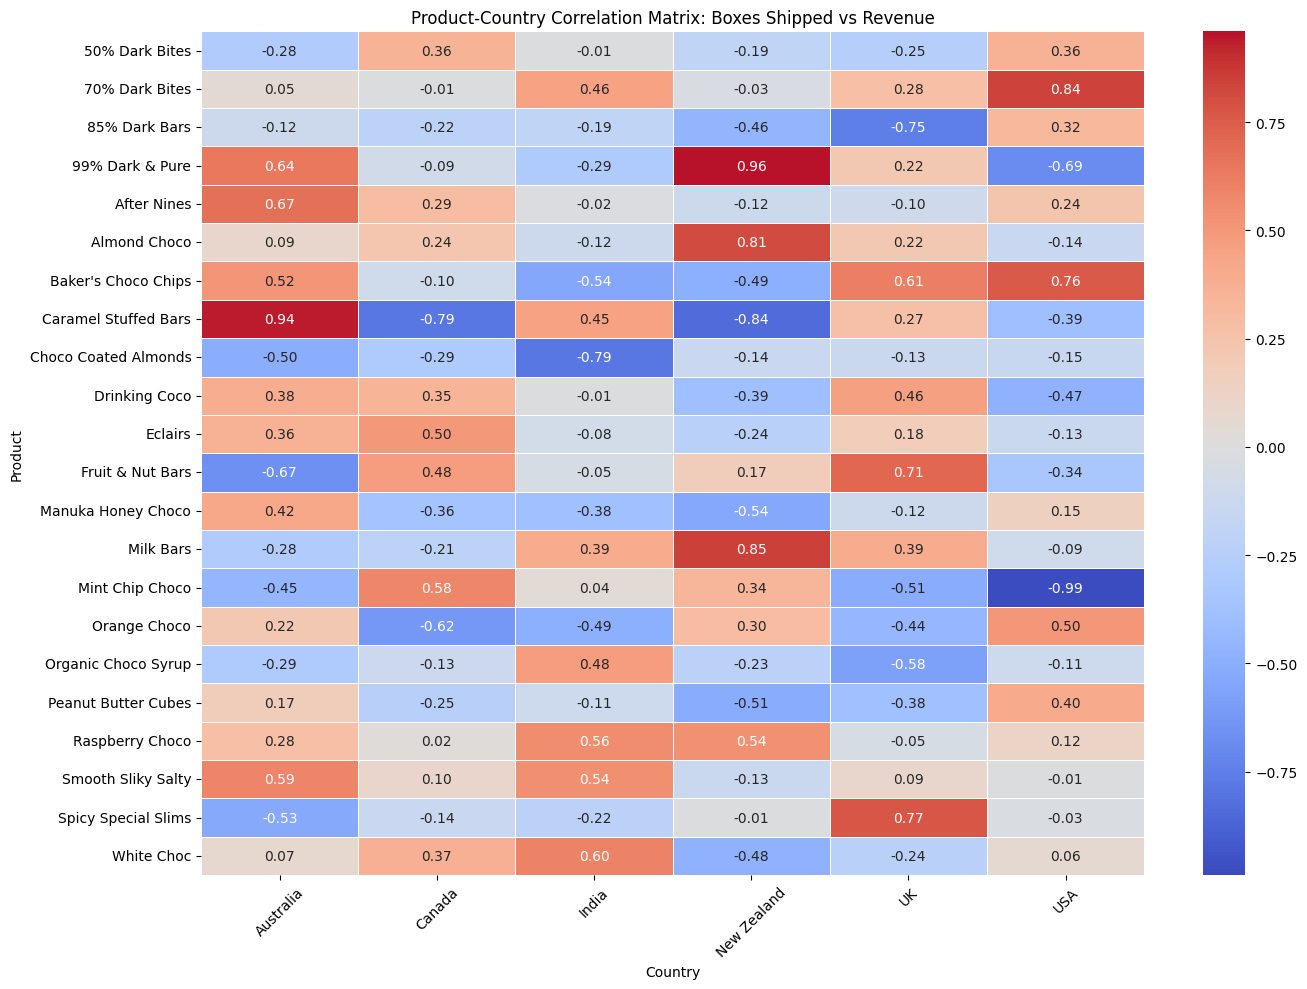


- +1 Correlation (Perfect Positive)
• Like selling ice cream on hot days• More boxes shipped = More sales every time• Example: If you ship 10 more boxes, sales always rise by $100

- 0.5 Correlation (Strong Positive)
• Like selling umbrellas in rainy season• More boxes usually increase sales, but not perfectly• Example: Ship 10 more boxes → Sales rise by ~$50 (not always exact)

- 0 Correlation (No Link)
• Like selling winter coats in summer• Shipping more boxes doesn’t change sales• Example: Your "White Choco" (0.01) – extra shipments don’t help

- -0.5 Correlation (Negative)
• Like flooding the market with diamonds• More boxes shipped = Lower sales• Example: Your "85% Dark Bars" (-0.15) – too many boxes make them seem cheap

- -1 Correlation (Perfect Negative)
• Like a fire sale – desperation hurts value• Every extra box shipped reduces sales• Example: Ship 10 more boxes → Sales drop by $100

- In Short:
• Positive number? Ship more to earn more.• Negative number? Ship less to earn 

In [ ]:
def analyze_country_product_correlations(data):
    results = []
    for country in data['Country'].unique():
        country_data = data[data['Country'] == country]
        corr_matrix = country_data.groupby('Product')[['Boxes Shipped', 'Amount']].corr().unstack().iloc[:,1]
        for product, corr in corr_matrix.items():
            results.append({
                'Country': country,
                'Product': product,
                'Correlation': corr
            })

    return pd.DataFrame(results)

country_correlations = analyze_country_product_correlations(data)


plt.figure(figsize=(14, 10))

# Heatmap of Correlations by Country

heatmap_data = country_correlations.pivot_table(index='Product',
                                              columns='Country',
                                              values='Correlation')
sns.heatmap(heatmap_data,
           cmap='coolwarm',
           center=0,
           annot=True,
           fmt=".2f",
           linewidths=.5)
plt.title('Product-Country Correlation Matrix: Boxes Shipped vs Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("""
- +1 Correlation (Perfect Positive)
• Like selling ice cream on hot days• More boxes shipped = More sales every time• Example: If you ship 10 more boxes, sales always rise by $100

- 0.5 Correlation (Strong Positive)
• Like selling umbrellas in rainy season• More boxes usually increase sales, but not perfectly• Example: Ship 10 more boxes → Sales rise by ~$50 (not always exact)

- 0 Correlation (No Link)
• Like selling winter coats in summer• Shipping more boxes doesn’t change sales• Example: Your "White Choco" (0.01) – extra shipments don’t help

- -0.5 Correlation (Negative)
• Like flooding the market with diamonds• More boxes shipped = Lower sales• Example: Your "85% Dark Bars" (-0.15) – too many boxes make them seem cheap

- -1 Correlation (Perfect Negative)
• Like a fire sale – desperation hurts value• Every extra box shipped reduces sales• Example: Ship 10 more boxes → Sales drop by $100

- In Short:
• Positive number? Ship more to earn more.• Negative number? Ship less to earn more.• Near zero? Shipments don’t affect sales.
""")


# Most Sale by revenue and Count

          Sales Person       sum  count
0         Ches Bonnell  320901.0     48
1           Oby Sorrel  316645.0     49
2      Madelene Upcott  316099.0     45
3          Brien Boise  312816.0     53
4        Kelci Walkden  311710.0     54
5          Van Tuxwell  303149.0     51
6  Dennison Crosswaite  291669.0     49
7       Beverie Moffet  278922.0     50
8          Kaine Padly  266490.0     45
9       Marney O'Breen  259742.0     45


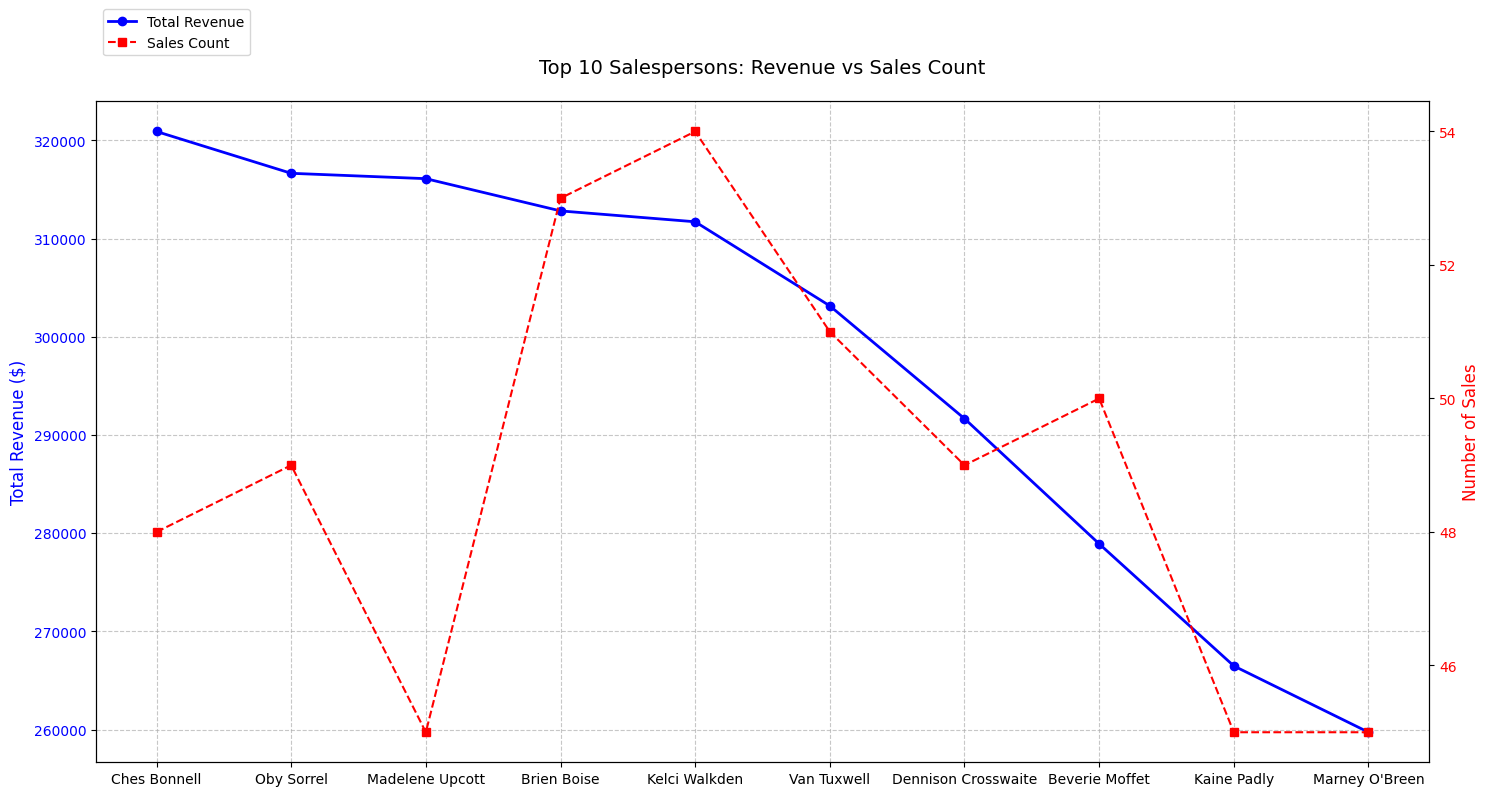

Top salesperson by revenue – Ches Bonnell generates the highest revenue, but their sales count is not the highest, indicating high-value transactions.
Oby Sorrel has the highest number of sales but does not lead in total revenue, suggesting they may sell lower-value products or smaller orders.
Revenue and sales count do not always correlate – Some salespeople generate high revenue with fewer transactions, while others make many sales but lower revenue.


In [ ]:

# Most Sale by revenue and Count
Sales_Person_Top10 = data.groupby(['Sales Person'])['Amount'].agg(['sum', 'count']).sort_values('sum', ascending=False).head(10).reset_index()
print(Sales_Person_Top10)
# Sort data by revenue (sum) descending to ensure proper top 10 order
Sales_Person_Top10 = Sales_Person_Top10.sort_values('sum', ascending=False)
# Create figure and axis for revenue
ax = plt.gca()
ax.plot(Sales_Person_Top10['Sales Person'],
        Sales_Person_Top10['sum'],
        color='blue',
        marker='o',
        linewidth=2,
        label='Total Revenue')

# Customize primary y-axis
ax.set_ylabel('Total Revenue ($)', color='blue', fontsize=12)
ax.tick_params(axis='y', labelcolor='blue')
ax.grid(True, linestyle='--', alpha=0.7)

# Create twin axis for sales count
ax2 = ax.twinx()
ax2.plot(Sales_Person_Top10['Sales Person'],
         Sales_Person_Top10['count'],
         color='red',
         marker='s',
         linestyle='--',
         label='Sales Count')

# Customize secondary y-axis
ax2.set_ylabel('Number of Sales', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Customize x-axis
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.xticks(rotation=90)
plt.xlabel('Sales Person', fontsize=12)

# Add combined legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2,
          loc='upper left',
          fontsize=10,
          bbox_to_anchor=(0, 1.15))

plt.title('Top 10 Salespersons: Revenue vs Sales Count',
          fontsize=14, pad=20)
plt.gcf().set_size_inches(15, 8)
plt.tight_layout()
plt.show()

print("""Top salesperson by revenue – Ches Bonnell generates the highest revenue, but their sales count is not the highest, indicating high-value transactions.
Oby Sorrel has the highest number of sales but does not lead in total revenue, suggesting they may sell lower-value products or smaller orders.
Revenue and sales count do not always correlate – Some salespeople generate high revenue with fewer transactions, while others make many sales but lower revenue.""")

# Plot Showing Sales By Month

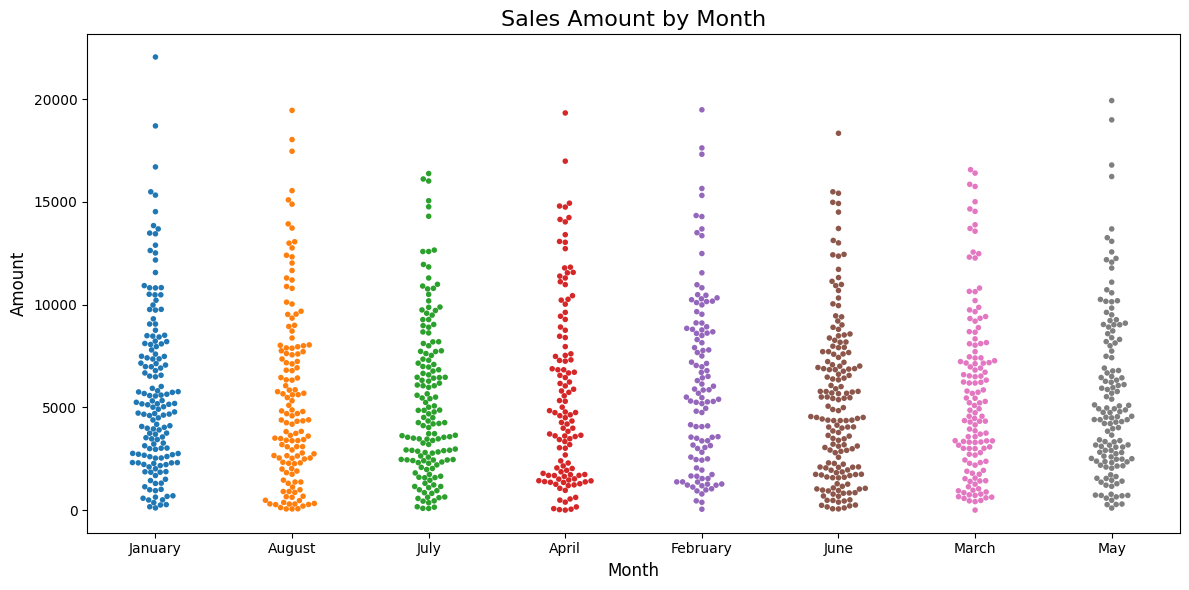

In all months, most sales transactions occur at lower values, meaning the majority fall within the lower range.
However, there are fewer high-value transactions, and a small number of large sales significantly contribute to the overall revenue,
highlighting the importance of these high-value deals.



In [ ]:
# Plot Showing Sales By Month
# Use swarmplot for better distribution of points
plt.figure(figsize=(12, 6))
sns.swarmplot(data=data, x='Month_Name', y='Amount', hue='Month_Name', size=4,legend = False)
plt.title('Sales Amount by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.tight_layout()
plt.show()
print("""In all months, most sales transactions occur at lower values, meaning the majority fall within the lower range.
However, there are fewer high-value transactions, and a small number of large sales significantly contribute to the overall revenue,
highlighting the importance of these high-value deals.
""")

# Monthly Sales by revenue compared to mean of sales my revenue


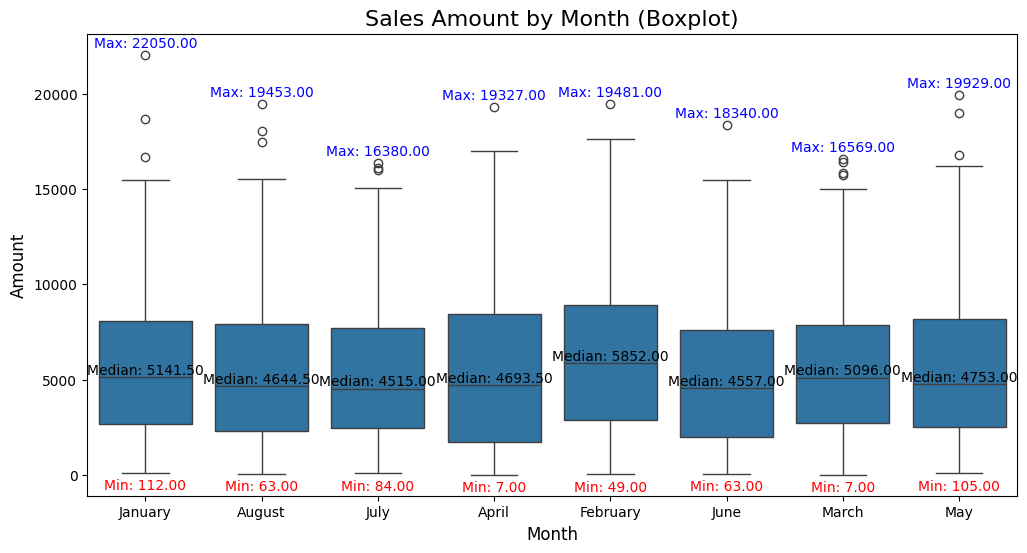

-The long upper whisker in January’s box plot highlights outliers or bulk orders, suggesting occasional high-value purchases skewed the data upward.
-The higher median line ($5,852) in February’s box indicates consistent mid-range sales compared to other months, with a smaller gap between median and max values.
-The gradual drop in median lines shows a decline in regular sales volume over time, visible in the lowering central box lines.
-The large box height (interquartile range) and long whisker in January imply significant variability—sales fluctuated widely, with some months having sporadic high transactions.
-The absence of upper whiskers (max values) for July/August suggests either no extreme sales or incomplete data, raising questions about late-summer sales behavior.




In [ ]:
#Monthly Sales by revenue compared to mean of sales my revenue using box plot

plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=data, x='Month_Name', y='Amount')

plt.title('Sales Amount by Month (Boxplot)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Amount', fontsize=12)

# Get categorical x-axis positions
unique_months = list(data['Month_Name'].unique())
x_positions = {month: i for i, month in enumerate(unique_months)}

# Offset values for readability
offsets = {'min': -900, 'max': 400, 'median': 0}

# Annotate statistics
for month in unique_months:
    month_data = data[data['Month_Name'] == month]['Amount']
    median = month_data.median()
    min_value = month_data.min()
    max_value = month_data.max()

    x_pos = x_positions[month]  # Get numeric x position

    ax.text(x_pos, max_value + offsets['max'], f'Max: {max_value:.2f}',
            horizontalalignment='center', fontsize=10, color='blue')

    ax.text(x_pos, min_value + offsets['min'], f'Min: {min_value:.2f}',
            horizontalalignment='center', fontsize=10, color='red')

    ax.text(x_pos, median + offsets['median'], f'Median: {median:.2f}',
            horizontalalignment='center', fontsize=10, verticalalignment='bottom', color='black')

plt.show()
print("""-The long upper whisker in January’s box plot highlights outliers or bulk orders, suggesting occasional high-value purchases skewed the data upward.
-The higher median line ($5,852) in February’s box indicates consistent mid-range sales compared to other months, with a smaller gap between median and max values.
-The gradual drop in median lines shows a decline in regular sales volume over time, visible in the lowering central box lines.
-The large box height (interquartile range) and long whisker in January imply significant variability—sales fluctuated widely, with some months having sporadic high transactions.
-The absence of upper whiskers (max values) for July/August suggests either no extreme sales or incomplete data, raising questions about late-summer sales behavior.

""")

# Showing the Top 10 items by revenue


<ipython-input-100-753d9cdb8a92>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product', y='Total Sales', data=Top_items, palette="mako", ax=ax1)
<ipython-input-100-753d9cdb8a92>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(Top_items['Product'], rotation=45, ha='right')


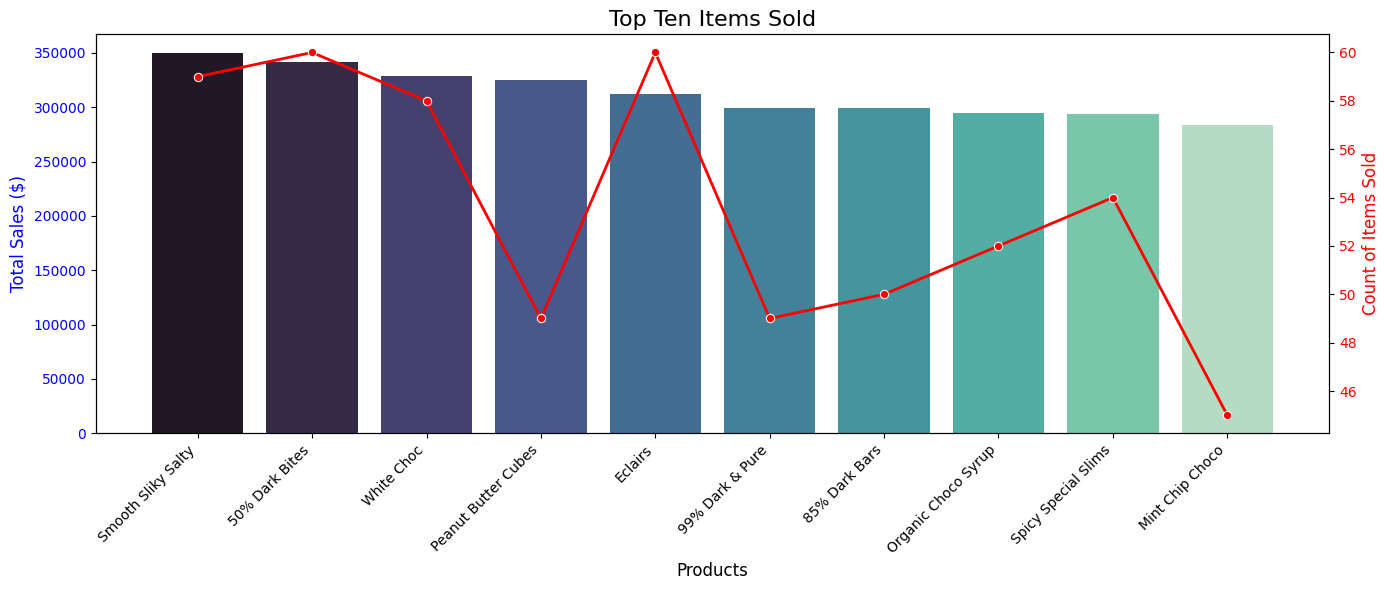

-Smooth Sliky Salty" generated the highest sales at $349,692, followed by "50% Dark Bites" and "White Choc.
-Peanut Butter Cubes" had the highest average sale per transaction ($6,629.43), indicating it might be a premium product.
-50% Dark Bites" and "Eclairs" had the highest transaction counts (60 each), showing strong consumer demand.
-Three dark chocolate products made it to the top 10, suggesting a growing preference for dark chocolate, possibly due to health benefits.
-High-selling items should be kept in stock, while premium items with high transaction values should be promoted aggressively to maximize revenue.



In [ ]:
# Showing the Top 10 items by revenue
Top_items = (data.groupby('Product')
                .agg({'Amount': ['sum', 'mean', 'count']})
                .sort_values(('Amount', 'sum'), ascending=False)  # Sort correctly
                .head(10)
                .reset_index())

# Rename columns for easy access
Top_items.columns = ['Product', 'Total Sales', 'Mean Sales', 'Count']
# Plot
fig, ax1 = plt.subplots(figsize=(14, 6))

# Bar plot for Total Sales
sns.barplot(x='Product', y='Total Sales', data=Top_items, palette="mako", ax=ax1)
ax1.set_ylabel('Total Sales ($)', fontsize=12, color='b')
ax1.set_xlabel('Products', fontsize=12)
ax1.tick_params(axis='y', labelcolor='b')

# Twin axes for Count line plot
ax2 = ax1.twinx()
sns.lineplot(x='Product', y='Count', data=Top_items, color='r', marker='o', linewidth=2, ax=ax2)
ax2.set_ylabel('Count of Items Sold', fontsize=12, color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Titles & Aesthetics
plt.title('Top Ten Items Sold', fontsize=16)
ax1.set_xticklabels(Top_items['Product'], rotation=45, ha='right')

plt.tight_layout()
plt.show()
print("""-Smooth Sliky Salty" generated the highest sales at $349,692, followed by "50% Dark Bites" and "White Choc.
-Peanut Butter Cubes" had the highest average sale per transaction ($6,629.43), indicating it might be a premium product.
-50% Dark Bites" and "Eclairs" had the highest transaction counts (60 each), showing strong consumer demand.
-Three dark chocolate products made it to the top 10, suggesting a growing preference for dark chocolate, possibly due to health benefits.
-High-selling items should be kept in stock, while premium items with high transaction values should be promoted aggressively to maximize revenue.
""")